In [2]:
from preprocessing import *
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm
matplotlib.rcParams['figure.figsize'] = [14,7]

In [3]:
def preprocessing(data, balance=True, train_size=0.5):
    import pandas as pd
    if balance : 
      data_non_nul=data[data.nombre_de_sinistre>0]
      data_nul=data[data.nombre_de_sinistre==0]
      data_nul_1,data_nul_2=train_test_split(data_nul,train_size=len(data_non_nul)/len(data_nul))
      data_clustering=pd.concat([data_non_nul,data_nul_1])
    else :
      data_clustering = data.copy()
    columns_conduc=["Classe_Age_Situ_Cont","Type_Apporteur","Activite"]
    columns_contrat=["Mode_gestion","Zone","Fractionnement","franchise","FORMULE",'Exposition_au_risque']
    columns_vehi=["Age_du_vehicule","ValeurPuissance","Freq_sinistre"]
    #columns_vehi=["Age_du_vehicule","ValeurPuissance"]
    data_clustering=data_clustering[columns_conduc+columns_contrat+columns_vehi]
    data_clustering.loc[:,"Classe_Age_Situ_Cont"]=data_clustering["Classe_Age_Situ_Cont"].apply(classe_age)
    data_clustering.loc[:,"franchise"]=data_clustering["franchise"].apply(franchise_)
    data_clustering.loc[:,["Type_Apporteur","Activite","Zone","FORMULE"]] = data_clustering[["Type_Apporteur","Activite","Zone","FORMULE"]].astype('str')
    data_clustering_d=pd.get_dummies(data_clustering)
    #data_scaled = normalize(data_clustering_d, axis=0) #On normalize pas car c'est majoritairement des dummies et des trucs d'ordre max 10
    data_scaled = data_clustering_d

    data_scaled = pd.DataFrame(data_scaled, columns=data_clustering_d.columns)
    #data_scaled["Freq_sinistre"] = data["Freq_sinistre"]

    if train_size < 1 :
        train_data,test_data = train_test_split(data_scaled,train_size=train_size)
    else :
        train_data,test_data = data_scaled, None
    return train_data,test_data

In [39]:
data = pd.read_csv("train_contrats_approx.csv", sep=";")
data_pre = preprocessing(data, balance=False, train_size=1.)[0]
#data_pre["Freq_sinistre"] = data["nombre_de_sinistre"] / data["Exposition_au_risque"] On prend l'approx car on compare avec Y

X = data_pre.drop("Freq_sinistre", axis=1, inplace=False).to_numpy()
Y = np.array(data_pre["Freq_sinistre"])

### Correlation

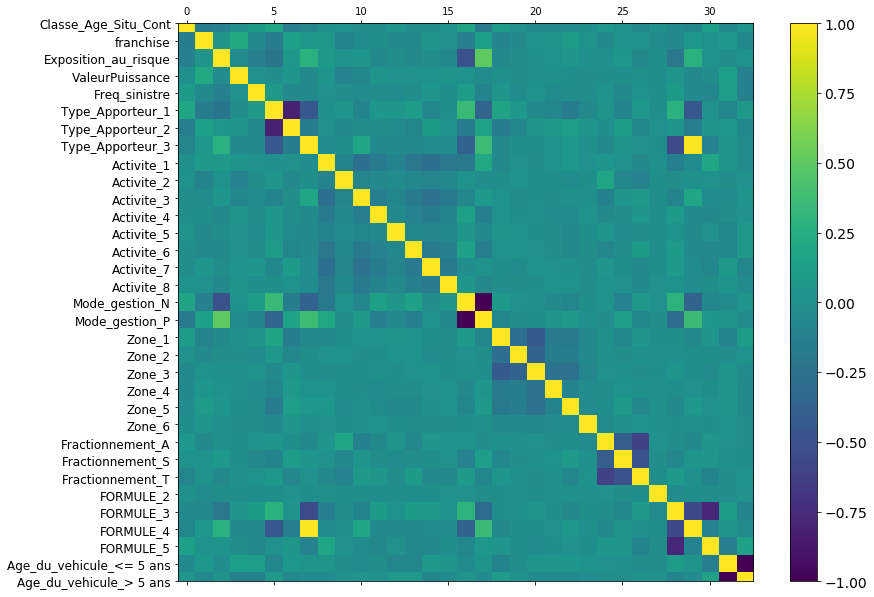

In [14]:
f = plt.figure(figsize=(13,10))
plt.matshow(data_pre.corr(), fignum=f.number)
#plt.xticks(range(data_pre.shape[1]), data_pre.columns, fontsize=12, rotation=45)
plt.yticks(range(data_pre.shape[1]), data_pre.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16, loc='bottom');

### Selection de variables

In [15]:
model = sm.OLS(Y, X).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     202.5
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:22:25   Log-Likelihood:            -1.2852e+05
No. Observations:               87228   AIC:                         2.571e+05
Df Residuals:                   87202   BIC:                         2.573e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0426      0.002     21.184      0.000       0.039       0.047
x2            -0.0405      0.004    -10.703      0.000      -0.048      -0.033
x3            -0.3256      0.013    -24.615      0.000      -0.352      -0.300
x4             0.0010      0.002      0.519      0.604      -0.003       0.005
x5            -0.0082      0.030     -0.273      0.785      -0.067       0.051
x6            -0.1145      0.030     -3.795      0.000      -0.174      -0.055
x7             0.2090      0.062      3.389      0.001       0.088       0.330
x8             0.1401      0.009     16.192      0.000       0.123       0.157
x9            -0.0533      0.019     -2.864      0.004      -0.090      -0.017
x10            0.0238      0.009      2.613      0.009       0.006       0.042
x11           -0.0497      0.012     -4.141      0.000      -0.073      -0.026
x12           -0.1395      0.019     -7.357      0.000      -0.177      -0.102
x13           -0.0036      0.011     -0.338      0.736      -0.024       0.017
x14            0.1471      0.009     16.396      0.000       0.129       0.165
x15            0.0214      0.011      1.973      0.048       0.000       0.043
x16            0.0761      0.012      6.281      0.000       0.052       0.100
x17            0.0102      0.013      0.813      0.416      -0.014       0.035
x18            0.1151      0.010     11.822      0.000       0.096       0.134
x19           -0.0199      0.010     -1.966      0.049      -0.040   -5.85e-05
x20            0.0932      0.009     10.529      0.000       0.076       0.111
x21           -0.0196      0.012     -1.585      0.113      -0.044       0.005
x22            0.0237      0.012      1.962      0.050    2.84e-05       0.047
x23           -0.1063      0.030     -3.496      0.000      -0.166      -0.047
x24            0.0632      0.009      6.854      0.000       0.045       0.081
x25           -0.0416      0.010     -4.337      0.000      -0.060      -0.023
x26            0.0647      0.009      7.184      0.000       0.047       0.082
x27           -0.0302      0.145     -0.208      0.835      -0.315       0.254
x28            0.1988      0.047      4.207      0.000       0.106       0.291
x29           -0.0771      0.078     -0.990      0.322      -0.230       0.076
x30           -0.0052      0.048     -0.110      0.912      -0.098       0.088
x31            0.1729      0.012     14.292      0.000       0.149       0.197
x32           -0.0866      0.012     -7.214      0.000      -0.110      -0.063
==============================================================================
Omnibus:                   114221.155   Durbin-Watson:                   1.465
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25156895.241
Skew:                           7.414   Prob(JB):                         0.00
Ku

### Selection de variables (2)

Le but est de prédire la fréquence sinistre à partir de la donnée des profils, avec une regression linéaire pénalisée, et d'observer quelles variables sont retenues. Le paramètre de régularistation doit être choisi par optimisation d'un critère évalué sur un jeu de test

In [19]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [24]:
err=0
score=0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.9)
    reg = linear_model.LinearRegression()
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    err += mean_squared_error(y_test,y_pred)
    score+= reg.score(X_test, y_test)
err /= 10
score /= 10
print(f"Erreur : {err}")
print(f"R^2 : {score}")

Erreur : 1.128233003634819
R^2 : 0.054592338066952295


Text(0, 0.5, 'Frequence de sinistre')

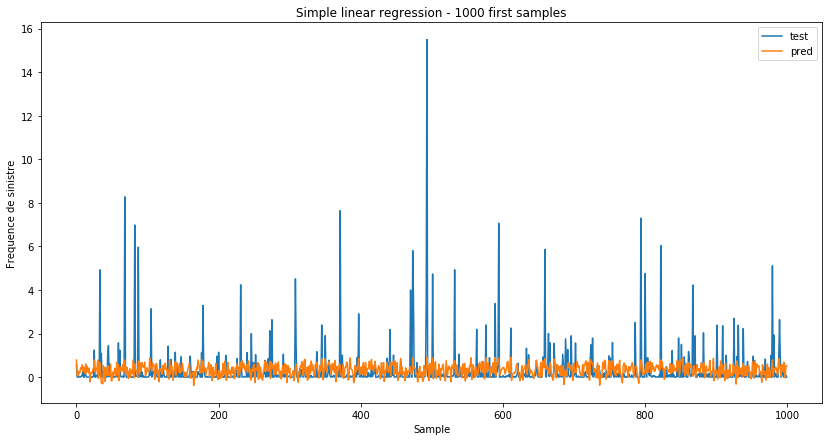

In [21]:
plt.plot(y_test[:1000], label="test")
plt.plot(y_pred[:1000], label="pred")
plt.legend()
plt.title("Simple linear regression - 1000 first samples")
plt.xlabel("Sample")
plt.ylabel("Frequence de sinistre")

In [25]:
err=0
score=0
for i in range(10):
    model = linear_model.Lasso(alpha=0.0001)
    X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.9)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score+= model.score(X_test, y_test)
    err += mean_squared_error(y_test,y_pred)
err/=10
score/=10
print(f"Erreur : {err}")
print(f"R^2 : {score}")

Erreur : 1.1141835046493398
R^2 : 0.053864906274205926


Computing regularization path using the coordinate descent lasso...


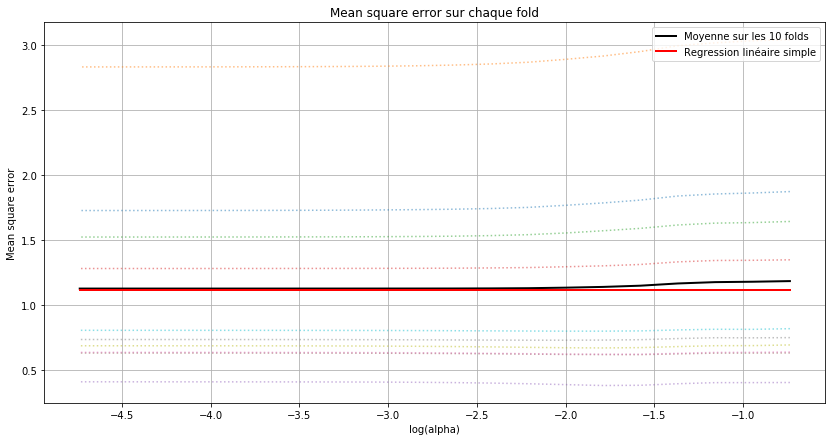

In [176]:
# Compute paths
from sklearn.linear_model import LassoCV

print("Computing regularization path using the coordinate descent lasso...")
model = LassoCV(cv=10, n_alphas=20,eps=0.0001).fit(X, Y)

# Display results
m_log_alphas = np.log10(model.alphas_)

plt.figure()
#ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':', alpha=0.5)
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k', label='Moyenne sur les 10 folds', linewidth=2)
#plt.axvline(np.log10(model.alpha_), linestyle='--', color='k', label='alpha: CV estimate')
plt.plot(m_log_alphas, [err]*len(m_log_alphas) ,linewidth=2, color='red', label="Regression linéaire simple")
plt.legend(loc="upper right")

plt.xlabel('log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error sur chaque fold')
plt.axis('tight')
plt.grid()
#plt.ylim(ymin, ymax)

Non concluant car les performances sont mauvaises. cela remet en cause l'hypothèse de linéarité entre la variables expliquée et les variables explicatives même.

### Selection de variables (3) - PCA

In [177]:
from sklearn.decomposition import PCA
pca = PCA(n_components=32)
pca.fit(X)
X_norm = normalize(X, axis=0)
x_pca=pca.fit_transform(X_norm)

(0.5, 32)

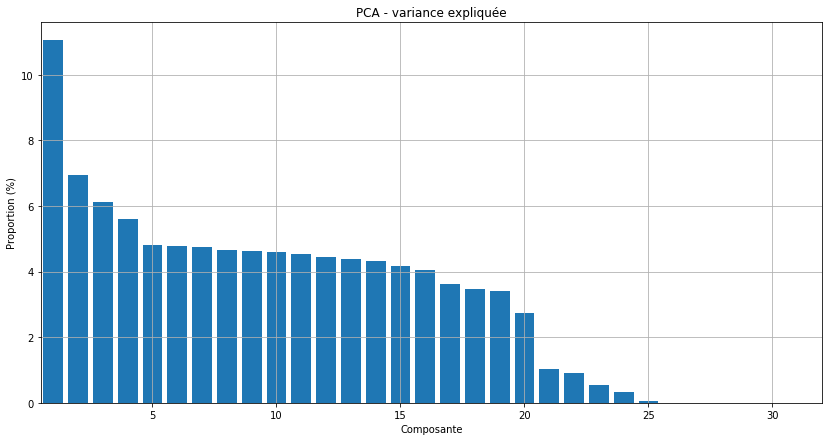

In [178]:
plt.bar(range(1,33),(pca.explained_variance_ratio_)*100)
plt.grid()
plt.title("PCA - variance expliquée")
plt.xlabel("Composante")
plt.ylabel("Proportion (%)")
plt.xlim(0.5,32)

In [179]:
bins = np.percentile(Y,q=[0,10,20,30,40,50,60,70,80,90])
classes = (np.digitize(Y, bins=bins))

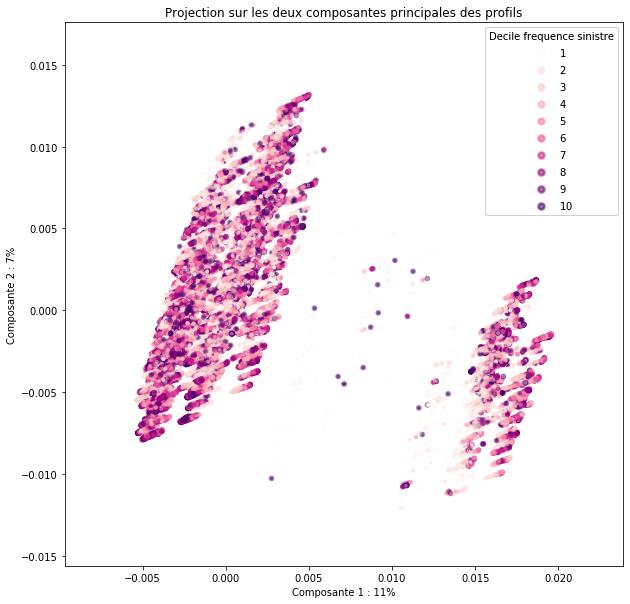

In [180]:
x = x_pca[:,0]
y = x_pca[:,1]
c = classes
s = classes

fig, ax = plt.subplots(figsize=(10,10))

scatter = ax.scatter(x, y,c=c,s=s,cmap="RdPu",linewidths=2.5, alpha=0.5)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Decile frequence sinistre")
ax.add_artist(legend1)
plt.title("Projection sur les deux composantes principales des profils")
plt.xlabel("Composante 1 : 11%")
plt.ylabel("Composante 2 : 7%")
plt.show()

Cela ne paraît pas très discriminant.

### Selection de variables (4) - Kernel PCA

In [126]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=32, kernel="rbf", copy_X =False)
#kpca.fit(X[:1000,])
X_norm = normalize(X[:2000,], axis=0)
x_kpca=kpca.fit_transform(X_norm)
expl_var = np.var(x_kpca, axis=0)/(np.var(x_kpca, axis=0).sum())
# MEMORY ERROR dès quelques milliers de points

Text(0, 0.5, 'Proportion (%)')

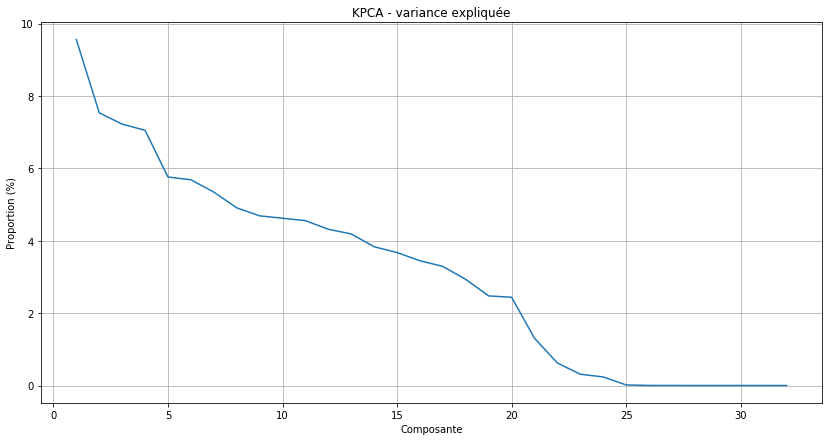

In [127]:
plt.plot(range(1,33), expl_var*100)
plt.grid()
plt.title("KPCA - variance expliquée")
plt.xlabel("Composante")
plt.ylabel("Proportion (%)")

### Visualisation (6) - t_SNE

t-SNE ne peut pas être utilisée comme une méthode de clustering car elle perd trop d'information (notamment sur la densité de points). Elle est appliquée ici pour mieux visualiser le jeu de données uniquement

In [160]:
from sklearn.manifold import TSNE
n=10000
#X_embedded = TSNE(n_components=2).fit_transform(x_pca[:n,:2])
X_embedded = TSNE(n_components=2).fit_transform(x_pca)

In [161]:
bins = np.percentile(Y,q=[0,10,20,30,40,50,60,70,80,90])
classes = (np.digitize(Y, bins=bins))

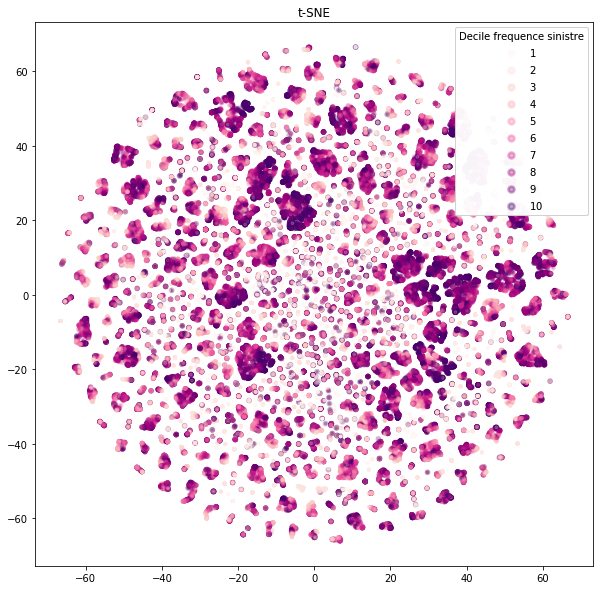

In [162]:
x = X_embedded[:,0]
y = X_embedded[:,1]
#c = classes[:n]
#s = classes[:n]
c = classes
s = classes

fig, ax = plt.subplots(figsize=(10,10))

scatter = ax.scatter(x, y,c=c,s=s,cmap="RdPu",linewidths=2.5, alpha=0.3)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Decile frequence sinistre")
ax.add_artist(legend1)
plt.title("t-SNE")
plt.show()